In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13,8)

In [3]:
df = pd.read_csv("./winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

## Wine Category
Let's create a new column 'category' which signifies the category of wine - High (1) or Low (0)

Wine with quality > 6 is considered to be High quality, rest are Low quality

In [5]:
#df.loc[df.b > 0, 'd'] = 1
df.loc[df.quality > 6, 'category'] = 1
df.loc[df.quality <= 6, 'category'] = 0

This is the frequency count for each category

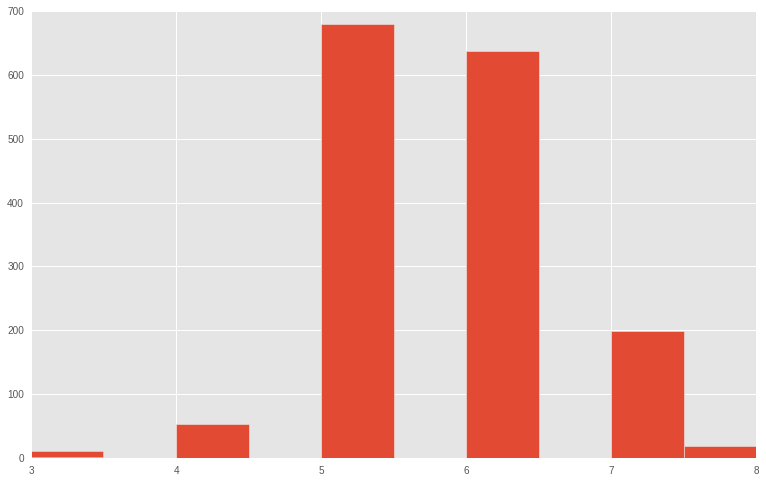

In [8]:
df.quality.hist()

In [13]:
df.category.value_counts()

0    1382
1     217
Name: category, dtype: int64

## Visual Exploration

Let's see how the columns are related

To start, lets take 2 variables at a time to explore data

### Fixed Acidity vs pH

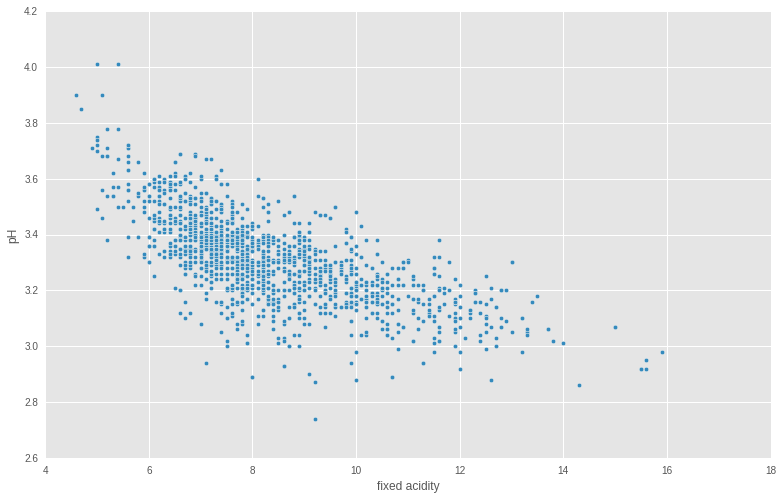

In [16]:
df.plot(x="fixed acidity", y="pH", kind="scatter")

Exercise: Try more exploring more with different pairs of columns

### 3 variable visualization
Let's add one more dimension to get more sense what is correlated

### Alcohol vs Volatile Acidity vs Category

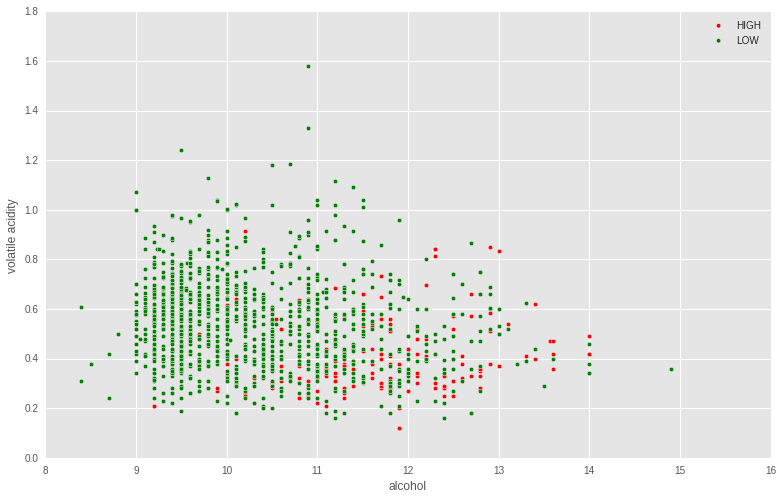

In [23]:
#df.plot(x="alcohol", y="volatile acidity", kind="scatter", c="category")
ax = df[df.category == 1].plot(x="alcohol", y="volatile acidity", kind="scatter", color="red", label="HIGH")
df[df.category == 0].plot(x="alcohol", y="volatile acidity", kind="scatter", color="green", label="LOW", ax=ax)

### Citric Acid vs Volatile Acidity vs Category

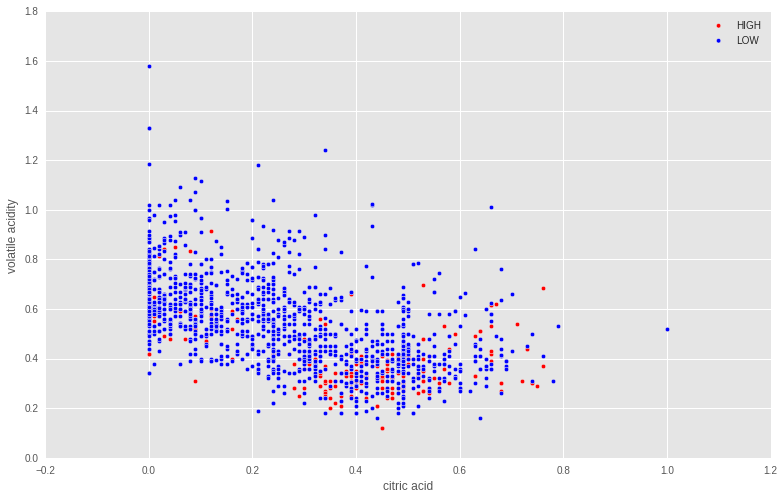

In [26]:
ax = df[df.category == 1].plot(x="citric acid", y="volatile acidity", kind="scatter", color="red", label="HIGH")
df[df.category == 0].plot(x="citric acid", y="volatile acidity", kind="scatter", color="blue", label="LOW", ax=ax)

Try the same for different columns. 

Try to find the combination of columns where you think data points are linearly separable

Looks like Volatile Acidity & Alcohol impact the category of wine.

Can we confirm?

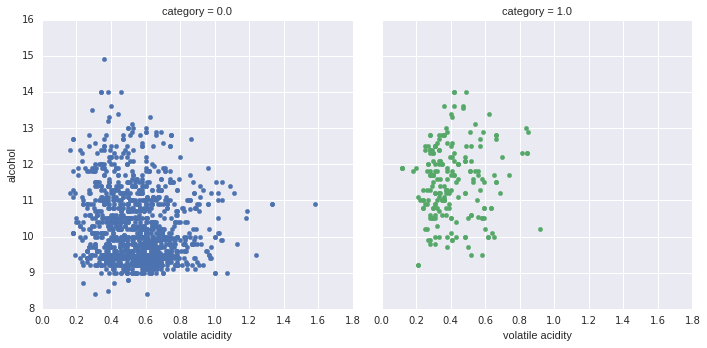

In [122]:
grid = sns.FacetGrid(data=df, col="category", hue="category", size=5)
grid.map(plt.scatter, "volatile acidity", "alcohol")

Can we do the same for citric acid & volatile acidity?

### Is there a way to plot all pair of columns at once?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3483119910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f347a04f350>]], dtype=object)

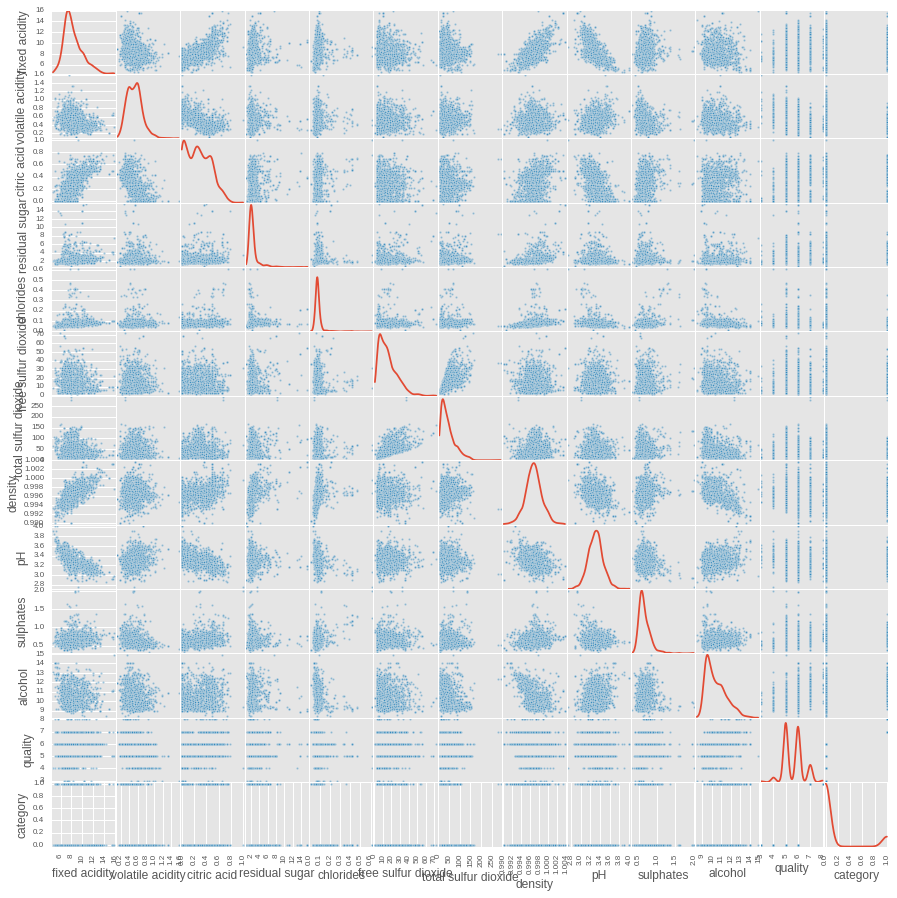

In [28]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,15), diagonal='kde')

Does citric acid, volatile acidity & alcohol affect the quality of wine?

In [128]:
from pandas.tools.plotting import parallel_coordinates

In [157]:
df_sort = pd.DataFrame()
df_sort["citric acid"] = df_norm["citric acid"]
df_sort["volatile acidity"] = df_norm["volatile acidity"]
df_sort["alcohol"] = df_norm["alcohol"]
df_sort["quality"] = df_norm["quality"]
df_sort["category"] = df_norm["category"]

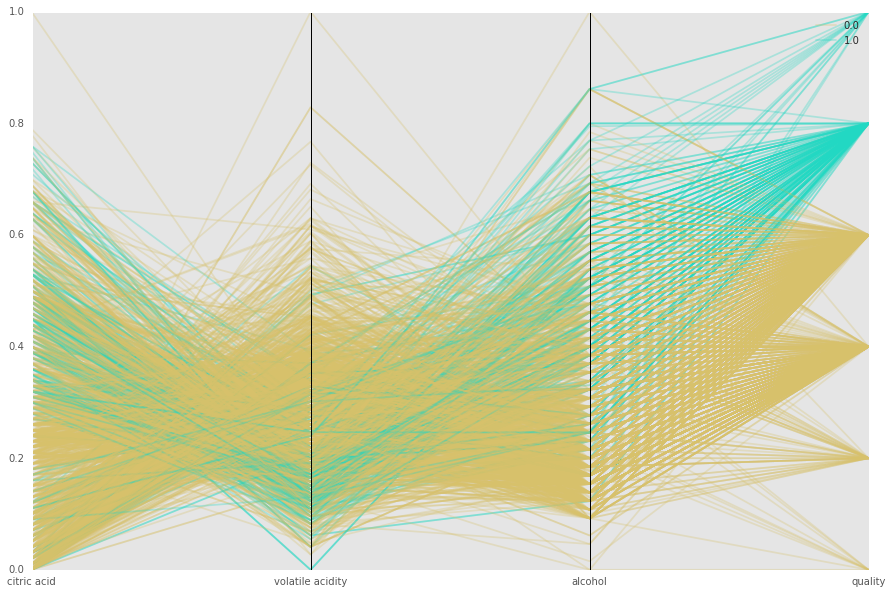

In [158]:
plt.figure(figsize=(15,10))
parallel_coordinates(df_sort, 'category', alpha=0.3)

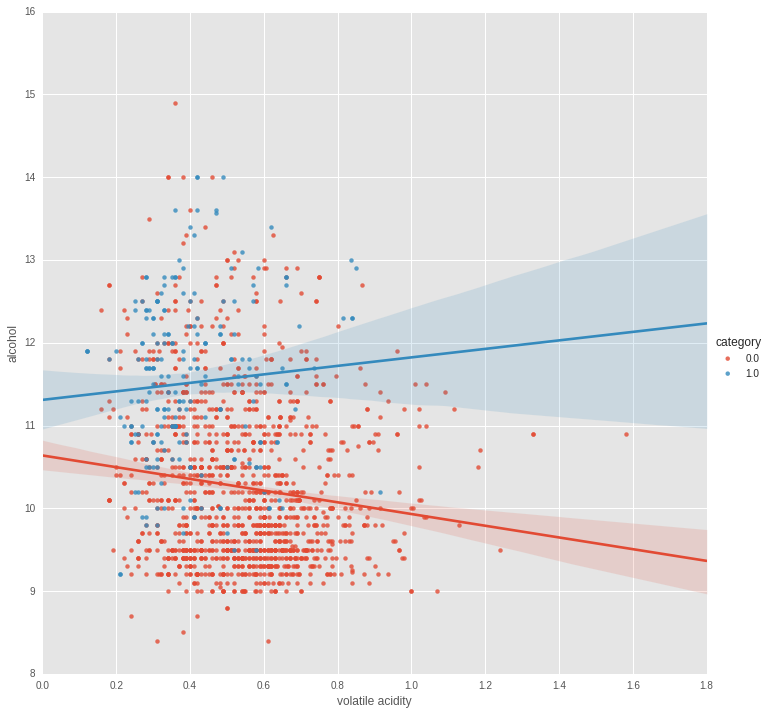

In [29]:
sns.lmplot(data=df,x="volatile acidity", y="alcohol", hue="category", size=10)

### Time to build a predictive model

Let's build a model that can predict the category of wine, given information about alcohol content and volatile acidity

Building a predictive model involves training the model with historical data known as **training data**. Once we have the model trained, the model can predict labels (in this case, the category of wine) for the given features (test data)
We have 1600 rows of the wine data, lets split this data into 80:20 ratio as training:testingg data

**Why do we need to do this? **

We can compare the predicted label with the actual label.
By doing this, we can measure how accurate our model is.

In [33]:
df.shape

(1599, 13)

In [34]:
df_train = df.iloc[:1280,]
df_test = df.iloc[1280:,]

In [42]:
X_train = df_train["volatile acidity"]
y_train = df_train["category"]

In [43]:
X_test = df_test["volatile acidity"]
y_test = df_test["category"]

In [44]:
X_train = X_train.reshape(X_train.shape[0],1)
#y_train = y_train.reshape(y_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)
#y_test = y_test.reshape(y_test.shape[0],1)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logistic_model = LogisticRegression()

In [47]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predicted = logistic_model.predict(X_test)

In [53]:
df_compare = pd.DataFrame()
df_compare["actual"] = y_test
df_compare["predicted"] = predicted
df_compare["volatile acidity"] = df_test["volatile acidity"]

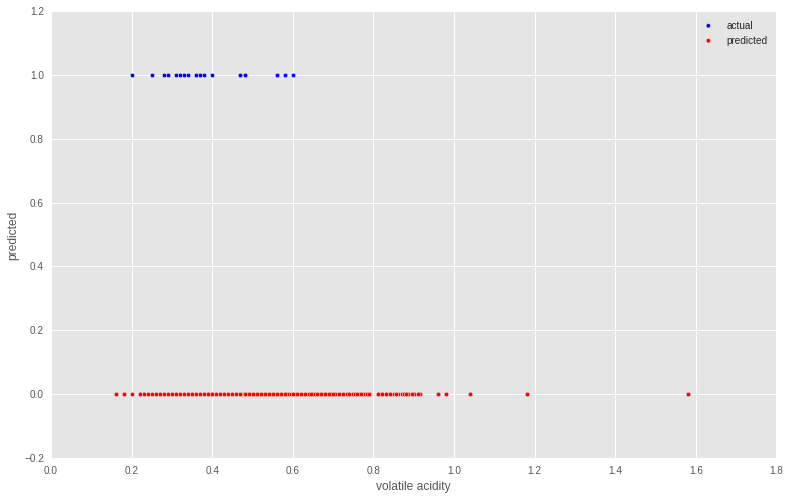

In [55]:
ax=df_compare.plot(x="volatile acidity", y="actual", kind="scatter", color="blue", label="actual")
df_compare.plot(x="volatile acidity", y="predicted", kind="scatter", color="red", label="predicted", ax=ax)

![](https://pixabay.com/static/uploads/photo/2013/04/01/09/07/surprise-98460_960_720.png)

Let's add more features - volatile acidity, citric acid, alcohol to predict the category